In [0]:
import numpy as np
import pandas as pd
from tensorflow import set_random_seed
seed = 25
np.random.seed(seed)
set_random_seed(seed)

In [2]:
# uploading files
from google.colab import files
uploaded = files.upload()

Saving dataset_final5.csv to dataset_final5 (1).csv


In [3]:
# importing to dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset_final5.csv']))
df.head()

,filename,genre,chroma_stft,spec_cent,spec_bw,rolloff,zcr,bpm,rms,mfcc1,...,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,mfcc50
0,hiphop.00039.wav,hiphop,0.392812,2693.202928,2937.743987,5976.540527,0.111564,95.703125,0.184535,-120.936802,...,-4.544398,-1.116098,-0.442828,1.368081,-1.351025,1.062983,-1.365897,-0.282049,-3.322343,-2.491533
1,classical.00008.wav,classical,0.254753,1516.831118,1629.756432,2974.121717,0.078778,135.999178,0.034045,-292.060391,...,-3.128277,-4.105968,-2.829742,-4.551546,-3.399555,0.326640,-0.111041,1.113019,-11.700742,-8.149296
2,country.00065.wav,country,0.282832,894.163206,1195.504133,1638.879933,0.038668,123.046875,0.110570,-250.869250,...,-1.986717,-2.687421,-6.502090,-3.036567,-3.380589,-6.804494,-3.721581,-4.942162,-2.600114,-0.758590
3,rock.00099.wav,rock,0.358401,1609.795082,1797.213044,3246.908930,0.076305,123.046875,0.054454,-235.161996,...,3.197235,-0.324466,1.586878,-2.962916,-2.659141,-3.414244,-9.300236,-3.464518,1.290004,-3.394978
4,country.00031.wav,country,0.313399,2053.229089,2187.759412,4094.556061,0.095325,112.347147,0.100855,-130.462863,...,-2.419361,0.125743,-1.987918,-2.968017,-5.894993,-7.130352,-2.982234,-1.969581,-5.291008,-8.074206


In [0]:
# Transferring data to arrays
X = df.get_values()
Y = X[:,1]
X = X[:,2:-20]

In [5]:
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

# splitting to train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=seed)

# encoding output classes
encoder = LabelBinarizer()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

# scaling input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from keras import models
from keras import layers
from keras import initializers
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU

# designing the network
model = models.Sequential()
model.add(layers.Dense(128,activation='linear',kernel_regularizer = regularizers.l2(0.001),kernel_initializer = initializers.VarianceScaling(scale=2.0, seed=seed),input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(layers.Dense(10,activation='softmax', kernel_initializer= initializers.VarianceScaling(scale=1.0,seed=seed)))

from keras import losses
from keras import optimizers

# cost function and optimization algorithm to use
model.compile(optimizer=optimizers.SGD(lr=0.41,decay=1e-5,momentum=0.9),loss = losses.categorical_crossentropy,metrics = ['accuracy'])

model.fit(X_train,Y_train,batch_size =900,epochs=30)


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
900/900 [==============================] - 1s 910us/step - loss: 2.9848 - acc: 0.0978
Epoch 2/30
900/900 [==============================] - 0s 8us/step - loss: 2.2842 - acc: 0.3378
Epoch 3/30
900/900 [==============================] - 0s 6us/step - loss: 2.3198 - acc: 0.3722
Epoch 4/30
900/900 [==============================] - 0s 4us/step - loss: 1.8475 - acc: 0.4556
Epoch 5/30
900/900 [==============================] - 0s 8us/step - loss: 1.7851 - acc: 0.4722
Epoch 6/30
900/900 [==============================] - 0s 5us/step - loss: 1.6540 - acc: 0.5222
Epoch 7/30
900/900 [==============================] - 0s 5us/step - loss: 1.4843 - acc: 0.5811
Epoch 8/30
900/900 [==============================] - 0s 5us/step - loss: 1.4329 - acc: 0.6011
Epoch 9/30
900/900 [==============================] - 0s 7us/step - loss: 1.3517 - acc: 0.6222
Epoch 10/30
900/900 [==============================] - 0s 6us/step - loss: 1.2313 - acc: 0.6467

In [7]:
Y_pred = model.predict(X_test)

# converting probablities to final class prediction
for i in range(0,100):
  for k in range(0,10):
    if Y_pred[i,k]< np.amax(Y_pred[i,:]) :
      Y_pred[i,k] = 0
    else:
      Y_pred[i,k] = 1
      
# testing the model on test dataset
from sklearn.metrics import accuracy_score
print("Test data accuracy: " ,accuracy_score(Y_pred,Y_test))


Test data accuracy:  0.83


In [0]:
# decoding labels
Y_test = encoder.inverse_transform(Y_test)
Y_pred = encoder.inverse_transform(Y_pred)

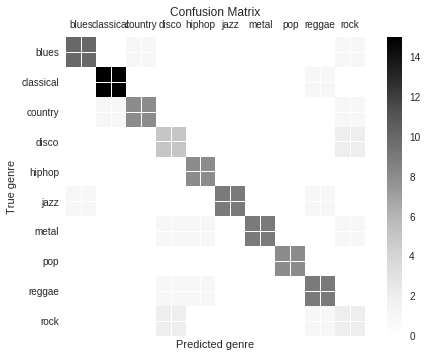

In [9]:
# plotting confusion matrix of our classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
 
labels = ['blues','classical','country', 'disco','hiphop', 'jazz', 'metal', 'pop','reggae', 'rock']

cm = confusion_matrix(Y_test,Y_pred,labels)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("Confusion Matrix")
plt.colorbar(cax)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel("Predicted genre")
plt.ylabel("True genre")
plt.show()


In [0]:
# saving the model
import pickle

pickle.dump(model,open("classifier.sav","wb"))
pickle.dump(scaler,open('scaler.sav','wb'))
pickle.dump(encoder,open('encoder.sav','wb'))

In [0]:
files.download('classifier.sav')

In [0]:
files.download('encoder.sav')

In [0]:
files.download('scaler.sav')